<a href="https://colab.research.google.com/github/krystianpoczewski/SIOC--zajecia/blob/main/Konwolucja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import io, color
from scipy.ndimage import convolve

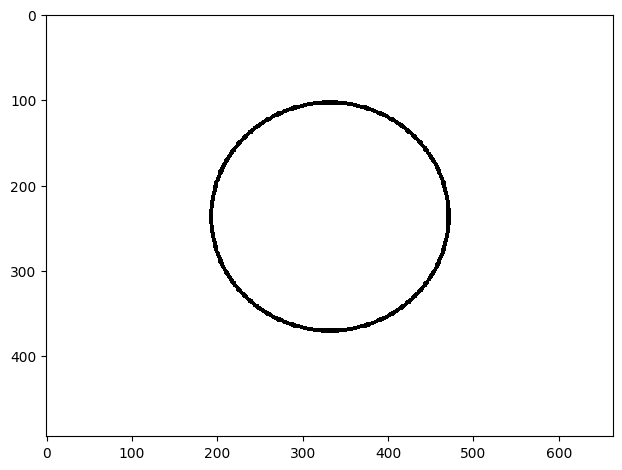

In [ ]:
img_to_detect_borders = io.imread('dotv2.png')
img_to_detect_borders = img_to_detect_borders[:, :, :3]
io.imshow(img_to_detect_borders)

In [ ]:
laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplace

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

In [ ]:
img_to_detect_borders.shape[2]

3

In [ ]:
def detect_borders_with_laplace(image):
  laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
  image = color.rgb2gray(image)
  io.imshow(image)
  image = convolve(image, laplace, mode="constant", cval=0.0)
  return np.clip(np.abs(image), 0, 1)

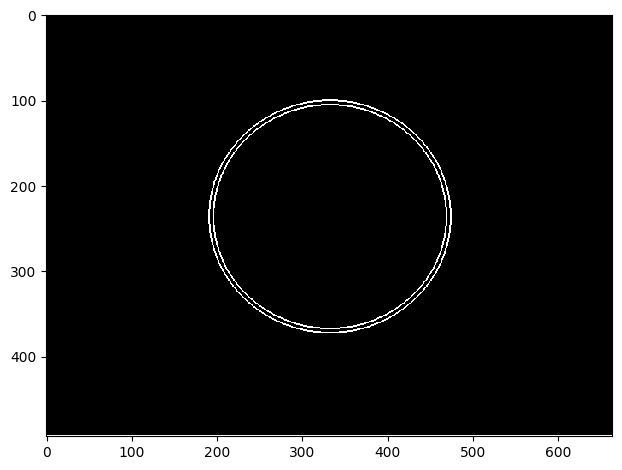

In [ ]:
detected_borders = detect_borders_with_laplace(img_to_detect_borders)
io.imshow(detected_borders)

In [ ]:
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_x

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [ ]:
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y

array([[-1, -2, -1],
       [ 0,  0,  0],
       [ 1,  2,  1]])

In [ ]:
def detect_borders_with_sobel(image):
  image = image.astype(float)

  image = color.rgb2gray(image)

  sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
  sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

  vector_gradient_x = np.zeros_like(image)
  vector_gradient_y = np.zeros_like(image)

  vector_gradient_x = convolve(image, sobel_x, mode="constant", cval=0.0)
  vector_gradient_y = convolve(image, sobel_y, mode="constant", cval=0.0)

  gradient = np.sqrt(vector_gradient_x**2 + vector_gradient_y**2).astype(np.uint8)

  return gradient

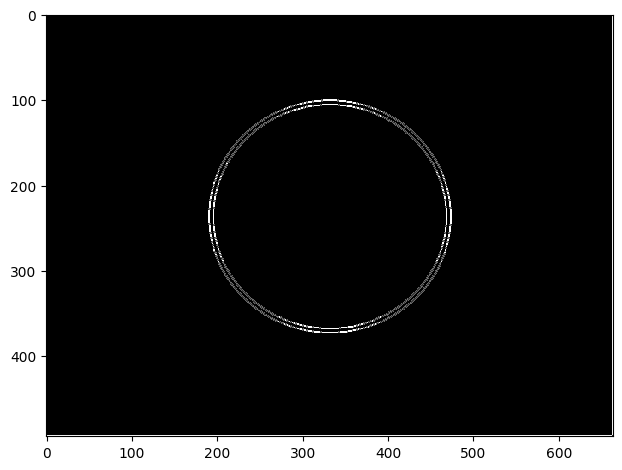

In [ ]:
detected_borders_sobel = detect_borders_with_sobel(img_to_detect_borders)
io.imshow(detected_borders_sobel)

In [ ]:
prewitt_x = np.array([[1, 0 , -1], [1, 0, -1], [1, 0, -1]])
prewitt_x

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [ ]:
prewitt_y = np.array([[1, 1 , 1], [0, 0, 0], [-1, -1, -1]])
prewitt_y

array([[ 1,  1,  1],
       [ 0,  0,  0],
       [-1, -1, -1]])

In [ ]:
def border_detetion_with_prewitt(image):
  image = image.astype(float)
  image = color.rgb2gray(image)
  prewitt_x = np.array([[1, 0 , -1], [1, 0, -1], [1, 0, -1]])
  prewitt_y = np.array([[1, 1 , 1], [0, 0, 0], [-1, -1, -1]])

  vector_gradient_x = np.zeros_like(image)
  vector_gradient_y = np.zeros_like(image)

  vector_gradient_x = convolve(image, prewitt_x, mode="constant", cval=0.0)
  vector_gradient_y = convolve(image, prewitt_y, mode="constant", cval=0.0)

  gradient = np.sqrt(vector_gradient_x**2 + vector_gradient_y**2).astype(np.uint8)

  return gradient

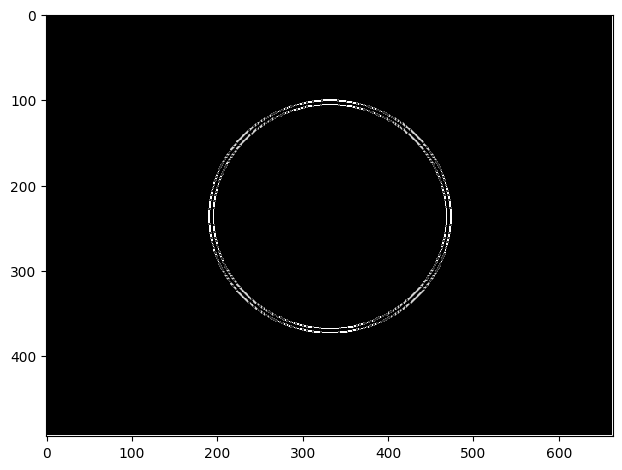

In [ ]:
detected_borders_prewitt = border_detetion_with_prewitt(img_to_detect_borders)
io.imshow(detected_borders_prewitt)

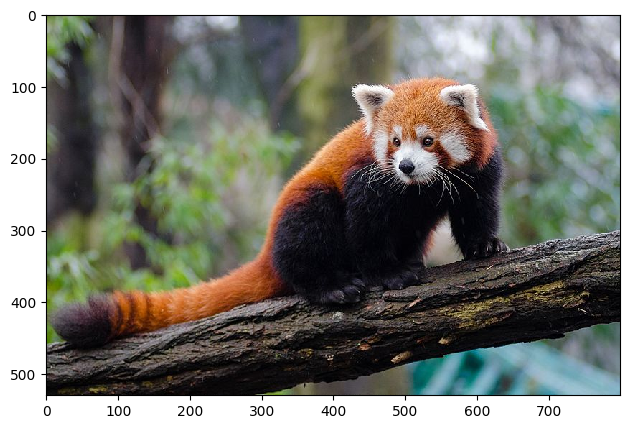

In [ ]:
img = io.imread('pobrane.jpg')
io.imshow(img)

In [ ]:
gauss_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
gauss_blur

array([[0.0625, 0.125 , 0.0625],
       [0.125 , 0.25  , 0.125 ],
       [0.0625, 0.125 , 0.0625]])

In [ ]:
gauss_blur.sum()

1.0

In [ ]:
def blur_image_with_gauss(image):
  gauss_blur = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])/16
  result = np.zeros_like(image)
  for channel in range(image.shape[2]):
    result[:,:,channel] = convolve(image[:, :, channel], gauss_blur, mode='constant', cval=0.0)
  return result

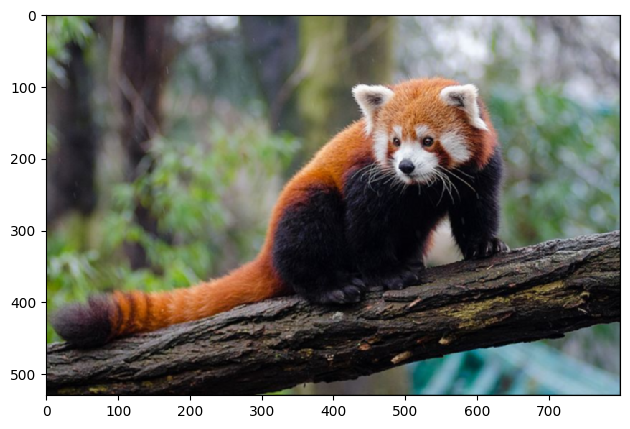

In [ ]:
image_blurred = blur_image_with_gauss(img)
io.imshow(image_blurred)

In [ ]:
sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpen

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [ ]:
def sharpen_image(image):
  sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
  image = image.astype(float)
  result = np.zeros_like(image)
  for channel in range(result.shape[2]):
    result[:, :, channel] = convolve(image[:, :, channel], sharpen, mode='constant', cval=0.0)
  return np.clip(result, 0, 255).astype(np.uint8)

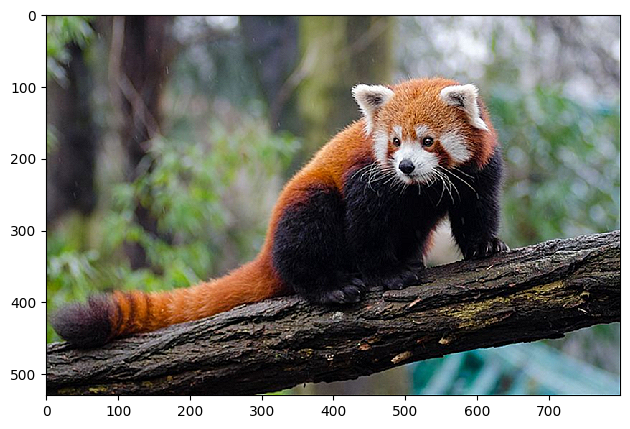

In [ ]:
image_sharpened = sharpen_image(image_blurred)
io.imshow(image_sharpened)

In [ ]:
gauss_5_on_5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 36, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])/256
gauss_5_on_5

array([[0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.0234375 , 0.09375   , 0.140625  , 0.09375   , 0.0234375 ],
       [0.015625  , 0.0625    , 0.09375   , 0.0625    , 0.015625  ],
       [0.00390625, 0.015625  , 0.0234375 , 0.015625  , 0.00390625]])

In [ ]:
gauss_5_on_5.sum()

1.0

In [ ]:
def Gauss_blur_5_on_5(image):
  gauss_5_on_5 = np.array([[1, 4, 6, 4, 1], [4, 16, 24, 16, 4], [6, 24, 32, 24, 6], [4, 16, 24, 16, 4], [1, 4, 6, 4, 1]])/256
  result = np.zeros_like(image)
  for channel in range(image.shape[2]):
    result[:,:,channel] = convolve(image[:, :, channel], gauss_blur, mode='constant', cval=0.0)
  return result

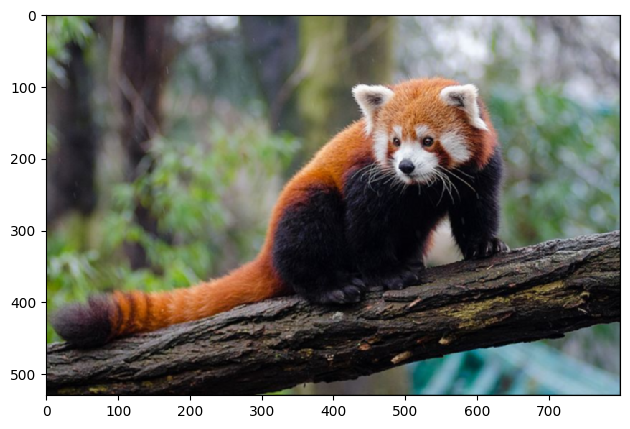

In [ ]:
image_blurred_5_on_5 = Gauss_blur_5_on_5(img)
io.imshow(image_blurred_5_on_5)

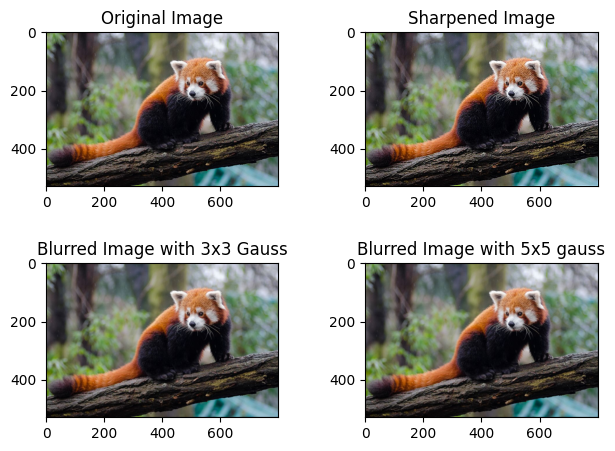

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(image_sharpened)
axes[0, 1].set_title('Sharpened Image')
axes[1, 0].imshow(image_blurred)
axes[1, 0].set_title('Blurred Image with 3x3 Gauss')
axes[1, 1].imshow(image_blurred_5_on_5)
axes[1, 1].set_title('Blurred Image with 5x5 gauss')

plt.subplots_adjust(hspace=0.5, wspace=-0.3)
plt.show()

Text(0.5, 1.0, 'Blurred Image with 5x5 gauss')

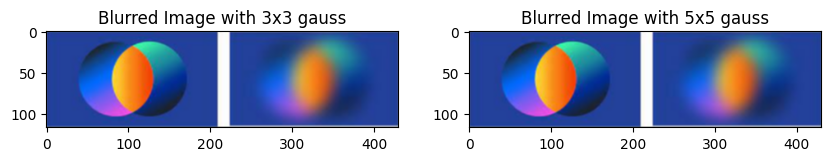

In [ ]:
im_to_display_blur = io.imread('blur_show.jpg')

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(blur_image_with_gauss(im_to_display_blur))
axes[0].set_title('Blurred Image with 3x3 gauss')
axes[1].imshow(Gauss_blur_5_on_5(im_to_display_blur))
axes[1].set_title('Blurred Image with 5x5 gauss')

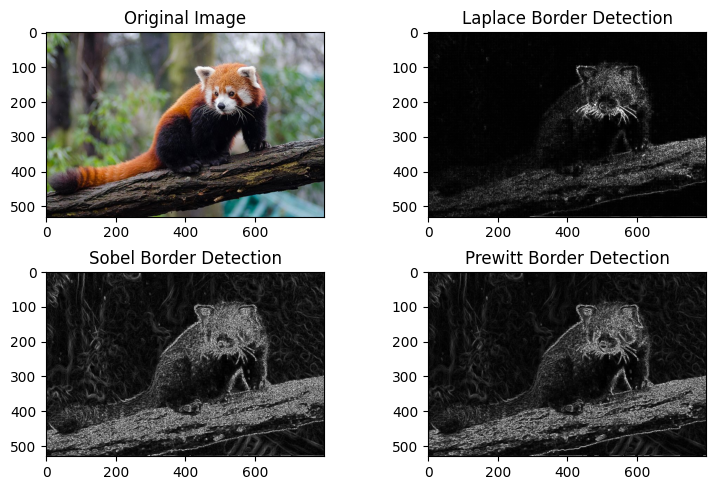

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes[0, 0].imshow(img)
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(detect_borders_with_laplace(img), cmap='gray')
axes[0, 1].set_title('Laplace Border Detection')
axes[1, 0].imshow(detect_borders_with_sobel(img), cmap='gray')
axes[1, 0].set_title('Sobel Border Detection')
axes[1, 1].imshow(border_detetion_with_prewitt(img), cmap='gray')
axes[1, 1].set_title('Prewitt Border Detection')

plt.subplots_adjust(hspace=0.3, wspace=-0.3)
plt.show()

Text(0.5, 1.0, 'With blur')

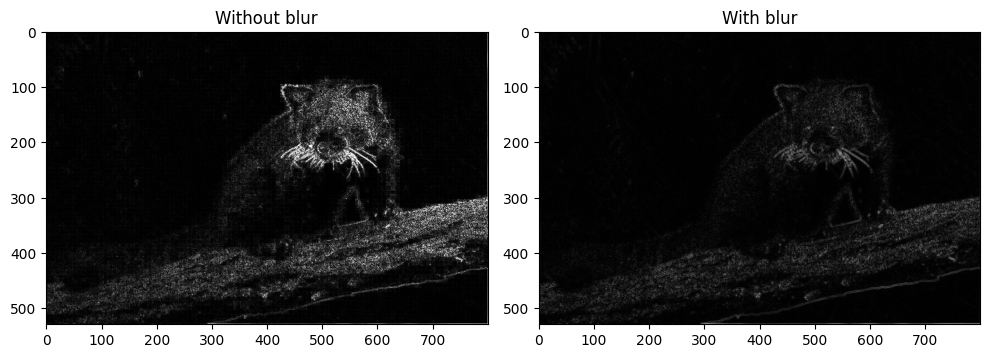

In [ ]:
#Applying gauss blur for laplace filter

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(detect_borders_with_laplace(img), cmap='gray')
axes[0].set_title('Without blur')
axes[1].imshow(detect_borders_with_laplace(blur_image_with_gauss(img)), cmap='gray')
axes[1].set_title('With blur')